In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [149]:
df=pd.read_csv(r'C:\Users\USER\Downloads\flipkart_com-ecommerce_sample\flipkart_com-ecommerce_sample.csv')

In [150]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [151]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [153]:
from collections import Counter
import nltk

In [154]:
#to check the number of rows and cols
df.shape

(20000, 15)

In [155]:
#Its important to check how much null data we have to,so no problems occur later on.
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [156]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [157]:
# Making a copy of orginal data
flipkart_data = df.copy()

In [158]:
flipkart_data .columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [159]:
flipkart_data.drop(flipkart_data.columns[[0,1,2,5,6,7,8,9,11,12,14]],axis=1, inplace=True)
flipkart_data

,product_name,product_category_tree,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


In [160]:
flipkart_data['product_category_tree'][0]

'["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]'

In [161]:
# A function to Clean the product_category_tree and return Primary_Category
def clean_prod_category():
  primary_category=[]
    #iterate in col
  for ele in flipkart_data['product_category_tree']: 
        ele=ele.replace('"]',"")
        category=ele[2:].split(" >>")
        primary_category.append(category[0])
  #returinig the clean data
  return primary_category

In [162]:
primary_category=clean_prod_category()
primary_category

['Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Pet Supplies',
 'Eternal Gandhi Super Series Crystal Paper Weight...',
 'Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Footwear',
 'Clothing',
 'Pet Supplies',
 'Clothing',
 'Pens & Stationery',
 'Clothing',
 'Furniture',
 'Footwear',
 'Clothing',
 'Furniture',
 'Pet Supplies',
 'Clothing',
 'Clothing',
 'Footwear',
 'Pet Supplies',
 'Clothing',
 'Sports & Fitness',
 'Beauty and Personal Care',
 'Clothing',
 'Clothing',
 'Bengal Blooms Rose Artificial Plant  with Pot (3...',
 'Clothing',
 'Pens & Stationery',
 'Pens & Stationery',
 'Pens & Stationery',
 'Clothing',
 'Pens & Stationery',
 'Clothing',
 'Bags, Wallets & Belts',
 'Clothing',
 'Footwear',
 'Home Decor & Festive Needs',
 'Automotive',
 'Tools & Hardware',
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Anarkali Kurta",
 'BuildTrack PIR Wireless Motion Sensor - One Swit...',
 'Skayvon SUMMERSIBLE SINGL

In [163]:
primary_category=pd.DataFrame(primary_category,columns=['Category'])
print('Number of Unique Categories',len(primary_category['Category'].value_counts()))

Number of Unique Categories 265


In [164]:
primary_category_top=Counter(primary_category['Category']).most_common(266)
primary_category_top

[('Clothing', 6198),
 ('Jewellery', 3531),
 ('Footwear', 1227),
 ('Mobiles & Accessories', 1099),
 ('Automotive', 1012),
 ('Home Decor & Festive Needs', 929),
 ('Beauty and Personal Care', 710),
 ('Home Furnishing', 700),
 ('Kitchen & Dining', 647),
 ('Computers', 578),
 ('Watches', 530),
 ('Baby Care', 483),
 ('Tools & Hardware', 391),
 ('Toys & School Supplies', 330),
 ('Pens & Stationery', 313),
 ('Bags, Wallets & Belts', 265),
 ('Furniture', 180),
 ('Sports & Fitness', 166),
 ('Cameras & Accessories', 82),
 ('Home Improvement', 81),
 ('Health & Personal Care Appliances', 43),
 ('Sunglasses', 40),
 ('Gaming', 35),
 ('Pet Supplies', 30),
 ('Home & Kitchen', 24),
 ('Home Entertainment', 19),
 ('eBooks', 15),
 ('Eyewear', 10),
 ("Clovia Women's Full Coverage Bra", 9),
 ("Vishudh Printed Women's Straight Kurta", 8),
 ("Lilliput Top Baby Girl's  Combo", 8),
 ('Olvin Aviator Sunglasses', 7),
 ("Clovia Women's T-Shirt Bra", 6),
 ("MASARA Solid Women's Straight Kurta", 5),
 ('Dressberry Gol

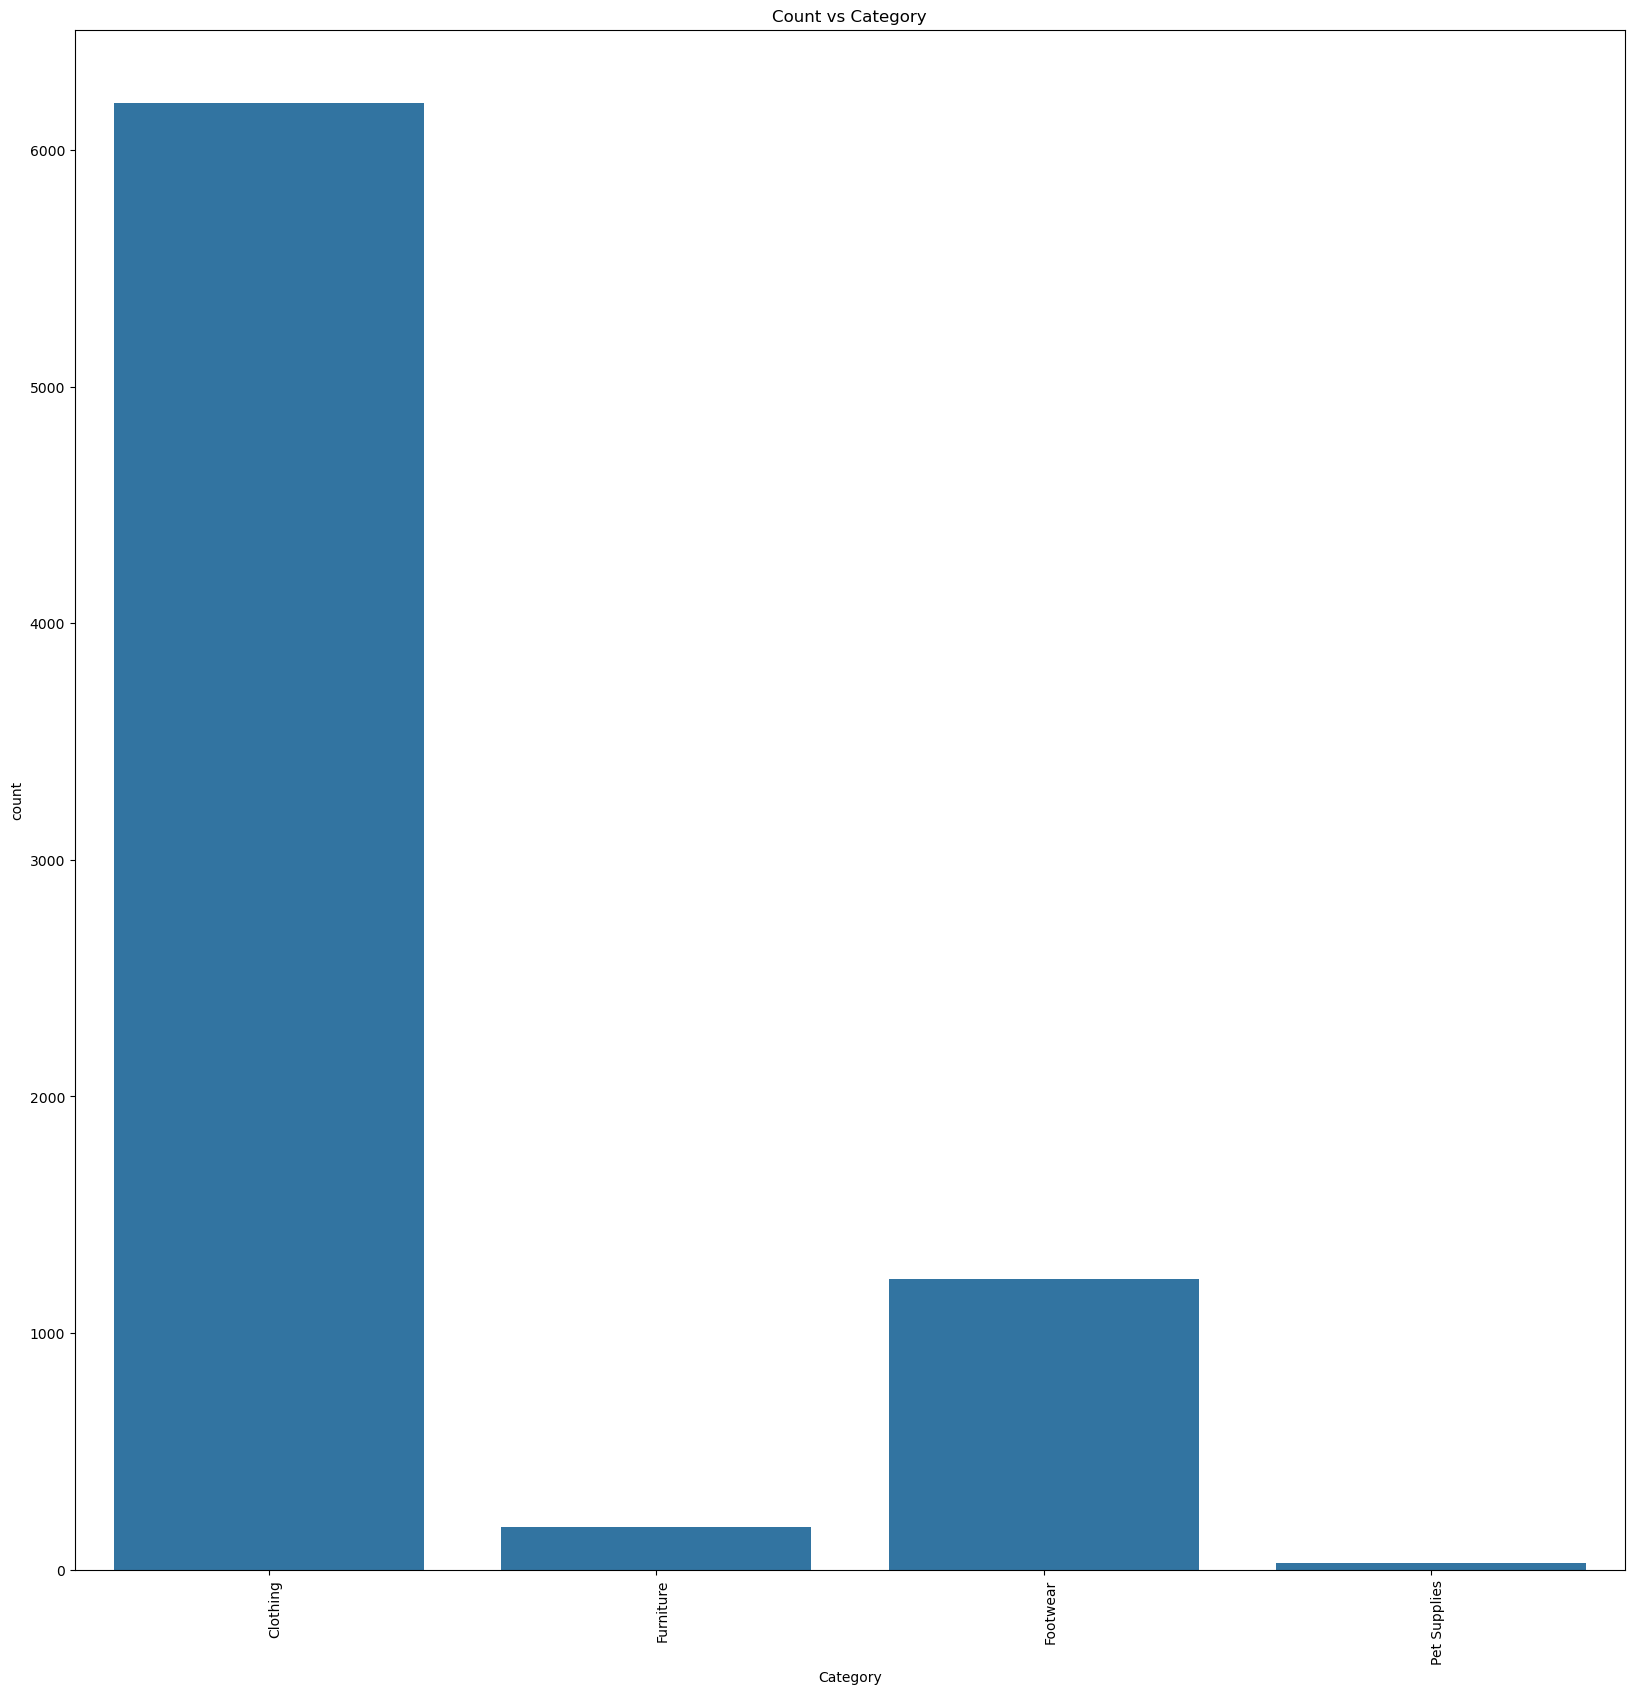

In [165]:
# When we will try to plot the categories and its count , we will get a messy graph as there are 265 categories.
plt.figure(figsize=(20,20))
plt.title('Count vs Category')
sns.countplot(x='Category',data=primary_category,order=primary_category['Category'].head().value_counts().index)
plt.xticks(rotation=90,fontsize=10,ha='left')
plt.show()

In [166]:
def count_of_category(n,bottom=False,List=False):
    output=[]
    primary_category_top=Counter(primary_category["Category"]).most_common(266)
    if bottom:
        for i in primary_category_top:
            if i[1]<=n:
                output.append(i)
    else:
                for i in primary_category_top:
                    if i[1]>=n:
                        output.append(i)
    if not List:
                output=pd.DataFrame(output,columns=["Category","Count"])
    return output
               

In [167]:
top_500_category = count_of_category(500) 

In [168]:
print(top_500_category)

                      Category  Count
0                     Clothing   6198
1                    Jewellery   3531
2                     Footwear   1227
3        Mobiles & Accessories   1099
4                   Automotive   1012
5   Home Decor & Festive Needs    929
6     Beauty and Personal Care    710
7              Home Furnishing    700
8             Kitchen & Dining    647
9                    Computers    578
10                     Watches    530


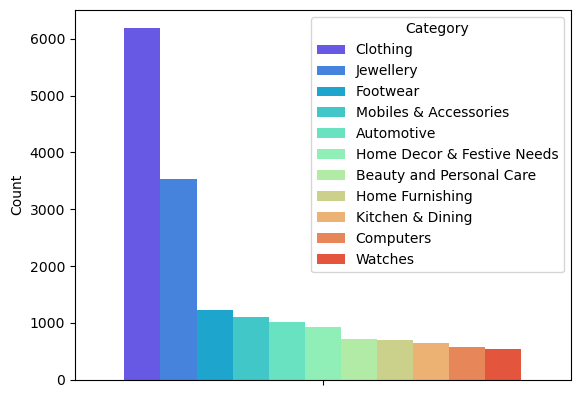

In [169]:
sns.barplot(hue="Category",y="Count", data=top_500_category,palette='rainbow',legend=True)
plt.xticks(rotation=90)
plt.show()

In [170]:
bottom_categories=count_of_category(500,bottom=True,List=True)

In [171]:
print("The number of categories with count less then 500 :",len(bottom_categories))

The number of categories with count less then 500 : 254


In [172]:
bottom_categories

[('Baby Care', 483),
 ('Tools & Hardware', 391),
 ('Toys & School Supplies', 330),
 ('Pens & Stationery', 313),
 ('Bags, Wallets & Belts', 265),
 ('Furniture', 180),
 ('Sports & Fitness', 166),
 ('Cameras & Accessories', 82),
 ('Home Improvement', 81),
 ('Health & Personal Care Appliances', 43),
 ('Sunglasses', 40),
 ('Gaming', 35),
 ('Pet Supplies', 30),
 ('Home & Kitchen', 24),
 ('Home Entertainment', 19),
 ('eBooks', 15),
 ('Eyewear', 10),
 ("Clovia Women's Full Coverage Bra", 9),
 ("Vishudh Printed Women's Straight Kurta", 8),
 ("Lilliput Top Baby Girl's  Combo", 8),
 ('Olvin Aviator Sunglasses', 7),
 ("Clovia Women's T-Shirt Bra", 6),
 ("MASARA Solid Women's Straight Kurta", 5),
 ('Dressberry Gold Synthetic  Clutch', 4),
 ('Pu-Good Women Flats', 4),
 ('FEET FLOW Women Flats', 4),
 ('Olvin Wayfarer Sunglasses', 4),
 ('Firangi Cotton, Polyester Free Floor Mat Firangi...', 4),
 ('Household Supplies', 4),
 ("Indistar Self Design Viscose Women's Stole", 3),
 ('Treppe Bellies', 3),
 ('F

In [98]:
flipkart_data["primary_category"]=primary_category
flipkart_data.head()

,product_name,product_category_tree,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies


In [99]:
flipkart_data.drop(flipkart_data.columns[[1]], axis=1, inplace=True)
flipkart_data=flipkart_data.dropna(subset=['description'])

In [100]:
flipkart_data[flipkart_data['description'].isnull()]

,product_name,description,brand,primary_category


In [101]:
flipkart_data[flipkart_data.isnull().any(axis=1)]

,product_name,description,brand,primary_category
25,Glus Wedding Lingerie Set,Glus Wedding Lingerie Set - Buy Turquoise Glus...,NaN,Clothing
26,Veelys Shiny White Quad Roller Skates - Size 4...,Veelys Shiny White Quad Roller Skates - Size 4...,NaN,Sports & Fitness
27,Bulaky vanity case Jewellery Vanity Case,Buy Bulaky vanity case Jewellery Vanity Case f...,NaN,Beauty and Personal Care
28,FDT Women's Leggings,FDT Women's Leggings - Buy Parrot Green FDT Wo...,NaN,Clothing
29,Madcaps C38GR30 Men's Cargos,Madcaps C38GR30 Men's Cargos - Buy Green Madca...,NaN,Clothing
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear


In [102]:
top_500_category = top_500_category['Category'][0:10]
top_10_categories = list(top_500_category)
top_10_categories

['Clothing',
 'Jewellery',
 'Footwear',
 'Mobiles & Accessories',
 'Automotive',
 'Home Decor & Festive Needs',
 'Beauty and Personal Care',
 'Home Furnishing',
 'Kitchen & Dining',
 'Computers']

In [103]:
flipkart_data

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies
...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign,Baby Care
19996,Wallmantra Large Vinyl Stickers Sticker,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,Baby Care
19997,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care
19998,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care


In [104]:
flipkart_data= flipkart_data[flipkart_data['primary_category'].isin(top_10_categories)][['product_name','description','brand','primary_category']]
flipkart_data

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
6,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,Footwear
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear


In [105]:
flipkart_data.describe()

,product_name,description,brand,primary_category
count,16629,16629,11832,16629
unique,10217,14455,2755,10
top,TheLostPuppy Back Cover for Apple iPad Air,TheLostPuppy Back Cover for Apple iPad Air (Mu...,Allure Auto,Clothing
freq,134,92,469,6197


In [106]:
flipkart_data_merged=flipkart_data.copy()
flipkart_data_merged

,product_name,description,brand,primary_category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
6,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,Footwear
...,...,...,...,...
19936,Purple Women Heels,Flipkart.com: Buy Purple Women Heels only for ...,NaN,Footwear
19941,Pinq Chiq Women Heels,Flipkart.com: Buy Pinq Chiq Women Heels only f...,NaN,Footwear
19953,La Isla Women Heels,Flipkart.com: Buy La Isla Women Heels only for...,NaN,Footwear
19958,We Witches Comfy Hues Women Wedges,Flipkart.com: Buy We Witches Comfy Hues Women ...,NaN,Footwear


In [107]:
flipkart_data_merged['text']= flipkart_data_merged['brand'].astype(str) +" "+ flipkart_data_merged['product_name'].astype(str) + " " + flipkart_data_merged['description'].astype(str)

In [108]:
flipkart_data_merged.drop(flipkart_data_merged.columns[[0,1,2]], axis=1, inplace=True)

In [109]:
flipkart_data_merged

,primary_category,text
0,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
2,Footwear,AW AW Bellies Key Features of AW Bellies Sanda...
3,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
6,Clothing,Alisha Alisha Solid Women's Cycling Shorts Key...
8,Footwear,"dilli bazaaar dilli bazaaar Bellies, Corporate..."
...,...,...
19936,Footwear,nan Purple Women Heels Flipkart.com: Buy Purpl...
19941,Footwear,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...
19953,Footwear,nan La Isla Women Heels Flipkart.com: Buy La I...
19958,Footwear,nan We Witches Comfy Hues Women Wedges Flipkar...


In [110]:
flipkart_data_merged=flipkart_data_merged.reindex(['text','primary_category'],axis="columns")
flipkart_data_merged

,text,primary_category
0,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
2,AW AW Bellies Key Features of AW Bellies Sanda...,Footwear
3,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
6,Alisha Alisha Solid Women's Cycling Shorts Key...,Clothing
8,"dilli bazaaar dilli bazaaar Bellies, Corporate...",Footwear
...,...,...
19936,nan Purple Women Heels Flipkart.com: Buy Purpl...,Footwear
19941,nan Pinq Chiq Women Heels Flipkart.com: Buy Pi...,Footwear
19953,nan La Isla Women Heels Flipkart.com: Buy La I...,Footwear
19958,nan We Witches Comfy Hues Women Wedges Flipkar...,Footwear


In [111]:
flipkart_data.drop(flipkart_data.columns[[0,2]], axis=1, inplace=True)
flipkart_data

,description,primary_category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
6,Key Features of Alisha Solid Women's Cycling S...,Clothing
8,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear
...,...,...
19936,Flipkart.com: Buy Purple Women Heels only for ...,Footwear
19941,Flipkart.com: Buy Pinq Chiq Women Heels only f...,Footwear
19953,Flipkart.com: Buy La Isla Women Heels only for...,Footwear
19958,Flipkart.com: Buy We Witches Comfy Hues Women ...,Footwear
